In [1]:
import numpy as np
import matplotlib
import sklearn.datasets
import sklearn.model_selection
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import random

from datetime import datetime
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
random.seed(datetime.now())

mnist = sklearn.datasets.fetch_openml('mnist_784')


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype float128 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype float128 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/matplotlib/image.py:369: UserWarning: Casting input data from 'float128' to 'float64'for imshow
  "for imshow".format(A.dtype))


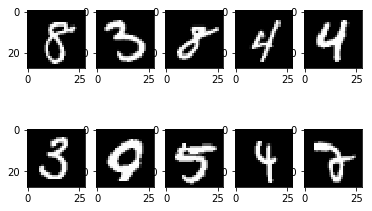

In [3]:
 #Visualising data

Xraw = mnist.data.astype('float128')
yraw = mnist.target.astype('int64')

X_train, X_test, y_train, y_test = train_test_split(Xraw, yraw, test_size=0.25, random_state=42)

X_train = (X_train.T/255)
X_test = (X_test.T/255)
y_train_raw = (y_train.reshape(1,-1))
y_test_raw = (y_test.reshape(1,-1))


Y_train = np.zeros((10, y_train_raw.shape[1]))
Y_test = np.zeros((10, y_test_raw.shape[1]))


for i,j in enumerate(y_train_raw.T):
  Y_train[j,i]=1
for i,j in enumerate(y_test_raw.T):
  Y_test[j,i]=1

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

for i in range(10):
  temp = random.randint(0, mnist.data.shape[1])
  plt.subplot(2,5,i+1)
  plt.imshow((X_train.T)[temp].reshape(28,28), cmap = 'gray')
  
plt.show()

In [5]:
def sigmoid(x):
  return 1/(1+np.e ** -x)

def derive(x,act):
  if act == "RELU":
    a = np.multiply((x > 0),x)
    return a
  if act == "SIGMOID":
    return np.multiply(x,(1-x))

def forwardProp(W,X,layers):
    
  cache = {}
  W1 = W[0]
  W2 = W[1]
  b1 = W[2]
  b2 = W[3]
  
  #Layer 1
  z1 = (np.dot(W1, X)) + b1
  a1 = np.multiply(z1,(z1 > 0)).astype('float32')
  
  #Layer 2
  z2 = (np.dot(W2, a1)).astype('float32') + b2
  a2 = sigmoid(z2).astype('float32')
  
  cach = {"a1" : a1, "b1":b1, "z1":z1, "b2":b2, "a2":a2, "z2":z2}
  return cach
    
def cost(AL,Y,m):
  cost = -1/m*np.sum((np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL))))
  return cost

def backProp(cache, y, X, W, alpha=0.1,m = 70000):
  W1 = W[0]
  W2 = W[1]
  b1 = W[2]
  b2 = W[3]
  
  dz2 = cache["a2"]- y
  dw2 = 1/m*np.dot(dz2, cache["a1"].T)
  db2 = 1/m*np.sum(dz2, axis = 1, keepdims = True)
  
  dz1 = np.dot(W2.T,dz2)
  dz1 = np.multiply(dz1, derive(cache["z1"], "RELU"))
  
  dw1 = 1/m*(np.dot(dz1,X.T))
  db1 = 1/m*np.sum(dz1, axis = 1, keepdims = True)
  
  W2 = W2 - alpha*dw2
  W1 = W1 - alpha*dw1
  
  b1 = b1 - alpha*db1
  b2 = b2 - alpha*db2

  W = [W1, W2, b1, b2]
  return W

[[3.28990963e-04 5.74806439e-05 1.48942877e-04 ... 1.75460142e-04
  4.44642927e-05 1.69938126e-04]
 [2.46942708e-04 1.95795575e-04 1.51861748e-04 ... 1.57839121e-04
  3.29487845e-04 1.60791984e-04]
 [2.34256172e-04 2.16162995e-04 2.42184494e-04 ... 3.43382291e-05
  1.86603943e-04 1.49022024e-04]
 ...
 [2.19282255e-05 2.79297578e-04 1.76836897e-05 ... 1.30362833e-04
  1.17817105e-04 1.57914103e-04]
 [2.76689705e-04 9.56115743e-05 3.62114258e-05 ... 2.17258746e-04
  1.84072231e-05 1.73663136e-04]
 [1.73423781e-04 2.10529382e-04 4.72563769e-06 ... 3.43128644e-04
  2.70181504e-04 4.15674305e-05]]


6.931564600370043


3.8516026736060773


3.115918599316605


3.0032744020598217


2.6215168474490396


2.283777478035738


2.136599119087427


1.9642371692891054


1.8181485983696082


1.7588756220998796


1.6416301601727494


1.3841542213506022


1.178381207596971


1.106890794487593


1.0859977395249192


1.0667307673933253


0.9500929296824042


0.9248863223751699


0.9158288713409197


0.910211928729827


0.9033801535560267


0.8128516780051805


0.7600921118829468


0.7466249033961988


0.7379637407533999


0.7306707776132702


0.7256511908302806


0.7217731345188481


0.7036695142296461


0.7057529819041127


0.7241943100816634


0.7157327515655959


0.6979877769005797


0.6680714977463378


0.6170095693099743


0.592765292219013


0.5814318527839428


0.5747588528054391


0.5714283176619263


0.5656907281925403


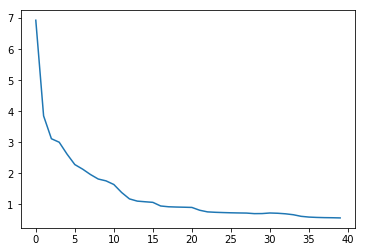

In [6]:
layers = [784,20,10]
costarr = []
W1 = np.random.rand(layers[1], layers[0])*np.sqrt(1/layers[0])*0.01
W2 = np.random.rand(layers[2], layers[1])*np.sqrt(1/layers[1])*0.01
b1 = np.zeros((layers[1],1)).astype('float32')
b2 = np.zeros((layers[2],1)).astype('float32')
print(W1)
W = [W1,W2,b1,b2]  
m = X_train_scaled.shape[1]
for i in range(4000):
    cache = forwardProp(W,X_train_scaled, layers)
    W = backProp(cache, Y_train,X_train_scaled, W, 0.05,m)
    if(i%100 == 0):
        a = cost(cache["a2"], Y_train, m)
        print(a)
        costarr.append(a)

plt.plot(costarr)
plt.show()

In [8]:
print(W[0])
def predict(xin,W, layers):
  cache = forwardProp(W,xin, layers)
  return cache["a2"]

def predict_test(xin,y, W, layers):
  op = predict(xin, W, layers)
  op = (op==np.max(op, axis = 0))
  print(op)
  wrong = np.sum(np.abs(op - y), axis = 0)
  acc = np.sum(wrong == 0)/xin.shape[1]*100
  return acc

[[ 1.06318330e-01  1.06046819e-01  1.06138282e-01 ...  1.06164799e-01
   1.06033803e-01  1.06159277e-01]
 [ 7.94395598e-02  7.93884126e-02  7.93444788e-02 ...  7.93504562e-02
   7.95221049e-02  7.93534090e-02]
 [-2.44516321e-02 -2.44697253e-02 -2.44437038e-02 ... -2.46515501e-02
  -2.44992844e-02 -2.45368663e-02]
 ...
 [ 2.34314753e-05  2.80800828e-04  1.91869395e-05 ...  1.31866083e-04
   1.19320355e-04  1.59417353e-04]
 [ 3.30430671e-01  3.30249593e-01  3.30190192e-01 ...  3.30371240e-01
   3.30172388e-01  3.30327644e-01]
 [ 9.99551583e-02  9.99922639e-02  9.97864602e-02 ...  1.00124863e-01
   1.00051916e-01  9.98233020e-02]]


/home/abhinavj98/.virtualenvs/mnist_tensorflow/lib/python3.5/site-packages/matplotlib/image.py:369: UserWarning: Casting input data from 'float128' to 'float64'for imshow
  "for imshow".format(A.dtype))


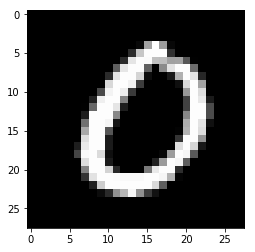

0
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False  True]
 ...
 [False False False ... False False False]
 [ True False  True ... False False False]
 [False False False ... False  True False]]
90.64


In [9]:
num = 7999
plt.imshow((X_train.T)[num].reshape(28,28), cmap = 'gray')
plt.show()
cache = predict((X_train.T)[num].reshape(-1,1), W, layers)

print(np.argmax(cache))

acc = predict_test(X_test_scaled, Y_test, W, layers)
print(acc)